<h1 style="color:blue">Simulation Project Part 2</h1>
<h1>Mohammad Saeed Zare Mehrjardi - 99243037</h1>
<h1>Zahra Sadat Esmati Baygi - 99243053 </h1>

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr
import pandas as pd
import seaborn as sns
from IPython.display import Image, display

In [3]:
sys.setrecursionlimit(10000)

# Create RSRBG Graph

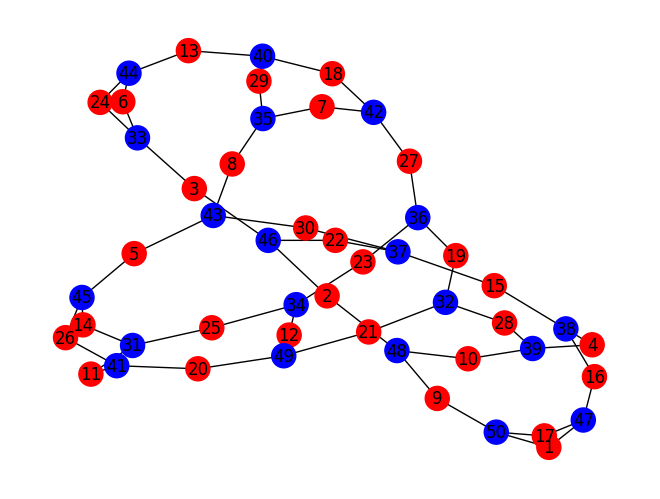

In [4]:
# generate a rsrbg graph with fallowing parameters
n = 50   # number of nodes
d1 = 2
d2 = 3

rsrbg_graph, color_map = gr.RSRBG(n, d1, d2)
nx.draw(rsrbg_graph,node_color = color_map,  with_labels=True)
plt.show()

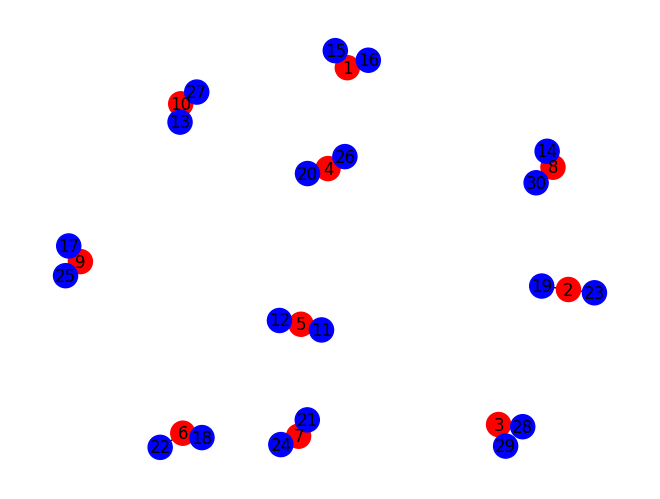

In [5]:
n = 30 # number of nodes
d1 = 2
d2 = 1

rsrbg_graph, color_map = gr.RSRBG(n, d1, d2)
nx.draw(rsrbg_graph,node_color = color_map,  with_labels=True)
plt.show()

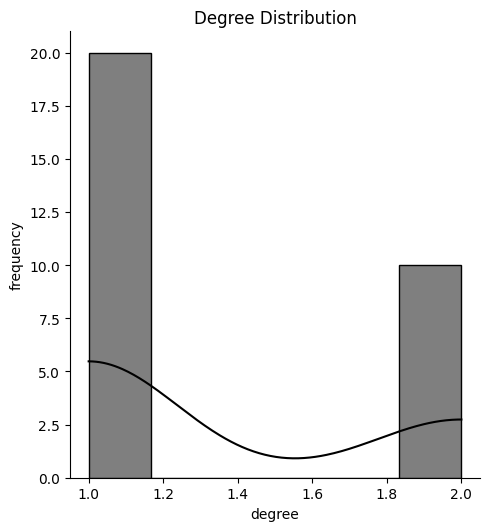

In [6]:
# degree distribution for rsrbg graph
gr.draw_degree_distribution(rsrbg_graph)

In [7]:
rsrbg_degree_df = pd.DataFrame({"node":rsrbg_graph.nodes(),"degree_of_node":list(d for n, d in rsrbg_graph.degree())})
rsrbg_degree_df

,node,degree_of_node
0,1,2
1,2,2
2,3,2
3,4,2
4,5,2
5,6,2
6,7,2
7,8,2
8,9,2
9,10,2


# Generate 100 RSRBG Graph with size 1000 and d1 = 10, d2 = 25

In [8]:
# rsrbg dataset
number_of_simulation = 1000
n = 100
d1 = 10
d2 = 15

rsrbgs = [gr.RSRBG(n, d1, d2)[0] for i in range(number_of_simulation)]

Text(0.5, 1.0, 'Degree Distribution')

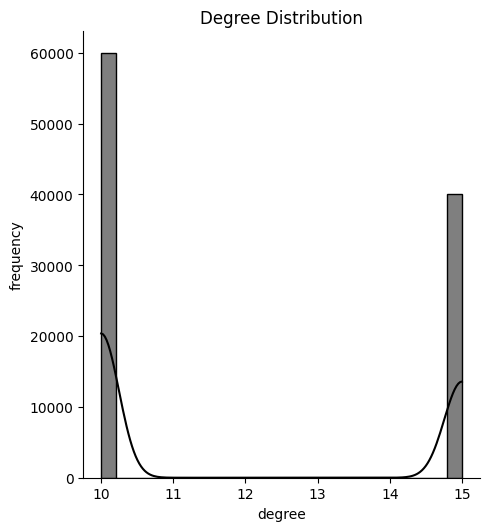

In [9]:
degrees = []
for rsrbg in rsrbgs:
    degrees += [d for n, d in rsrbg.degree()]

sns.displot(degrees, kde=True, color="black")

plt.xlabel("degree")
plt.ylabel("frequency")
plt.title("Degree Distribution")

Text(0.5, 1.0, 'eigen value Distribution')

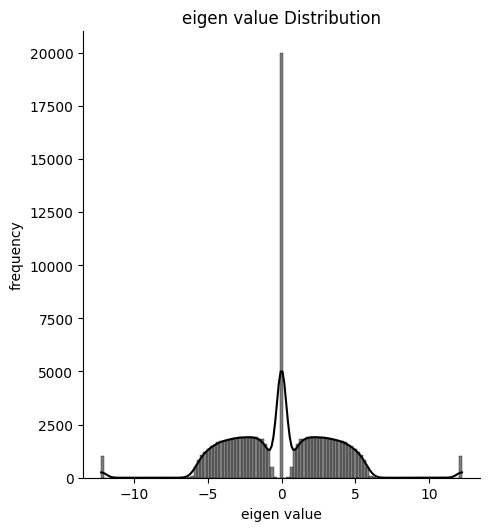

In [10]:
eigens = []
for rsrbg in rsrbgs:
    eigens += [d for d in gr.complex_abs(gr.adjacency_eigen_values(rsrbg))]

sns.displot(eigens, kde=True, color="black")

plt.xlabel("eigen value")
plt.ylabel("frequency")
plt.title("eigen value Distribution")    

In [12]:
# generate 100 RSRBG graph
number_of_simulation = 100
d_random_range = 20
multiplier = 20

rsrbg_graphs = [] # dataset


for _ in range(0, number_of_simulation):
    d1 = random.randint(1,d_random_range)
    d2 = random.randint(1,d_random_range)
    n = ((d1 + d2) * random.randint(1, multiplier))

    rsrbg_graph, color_map = gr.RSRBG(n, d1, d2)
    rsrbg_graphs.append({
      "n": n,
      "d1": d1,
      "d2": d2,
      "node_color": color_map,
      "graph": rsrbg_graph
    })    

### possibility of inconsistency

In [35]:
incount = 0
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    if not nx.is_connected(rsrbg):
        incount += 1

print(f"p = {incount / len(rsrbgs)}")   

p = 0.013


In [13]:
df_table = []
for rsrbg_graph in rsrbg_graphs:
    n = rsrbg_graph['n']
    d1 = rsrbg_graph['d1']
    d2 = rsrbg_graph['d2']
    rsrbg_graph = rsrbg_graph['graph']
    
    sg = gr.spectral_gap(rsrbg_graph)
    ac = gr.algebraic_connectivity(rsrbg_graph)
    ng = gr.natural_connectivity(rsrbg_graph)
    r = gr.symmetry_ratio(rsrbg_graph)
    e = gr.energy(rsrbg_graph)
    le = gr.laplacian_energy(rsrbg_graph)
    
    
    df_table.append([n, d1, d2, sg, ac, ng, r, e, le])

In [14]:
# create dataframe for rsrbg set
cols = ['n', 'd1', 'd2', 'spectral gap', 'algebratic connectivity', 'natural connectivity', 'r', 'energy', 'laplacian energy']
df = pd.DataFrame(df_table, columns=cols, index=range(1, 101))  
df.head(30)

,n,d1,d2,spectral gap,algebratic connectivity,natural connectivity,r,energy,laplacian energy
1,56,11,3,1.546283,1.201245,2.384259,4.166667,75.491705,178.449585
2,95,16,3,2.069292,1.384643,2.922420,5.166667,115.401173,361.648565
3,19,6,13,8.831761,6.000000,5.889801,1.000000,17.663522,69.473684
4,72,2,16,1.236670,0.721230,2.199447,3.400000,62.735645,215.938433
5,338,16,10,6.074528,5.773304,6.865712,43.500000,940.642419,1432.939519
6,145,9,20,7.009340,6.056036,8.446541,18.200000,362.388577,813.832978
7,14,1,6,0.000000,0.000000,0.867627,2.313559,9.797959,21.142857
8,38,1,1,0.000000,0.000000,0.433781,1.947368,38.000000,38.000000
9,520,13,13,6.294524,6.294524,6.794585,86.666667,1586.118476,1586.118476
10,190,18,1,0.000000,0.000000,1.516927,2.850000,84.852814,342.105263


# Calculate Spectral Gap

mean is 3.7698457725619994
standard deviation is 3.148637357284757
CI is (3.1527128505341873, 4.3869786945898115)


(3.7698457725619994,
 3.148637357284757,
 0.6171329220278123,
 (3.1527128505341873, 4.3869786945898115))

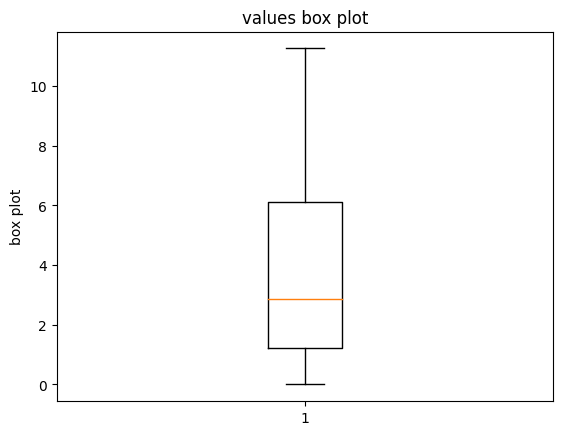

In [23]:
sum_spectral_gaps = []
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    sum_spectral_gaps.append(gr.spectral_gap(rsrbg))

gr.calculate_statistics_parameters(sum_spectral_gaps)

# Calculate Algebratic Connectivity


mean is 3.3706380129019995
standard deviation is 2.997463874122804
CI is (2.7831350935739296, 3.9581409322300694)


(3.3706380129019995,
 2.997463874122804,
 0.5875029193280696,
 (2.7831350935739296, 3.9581409322300694))

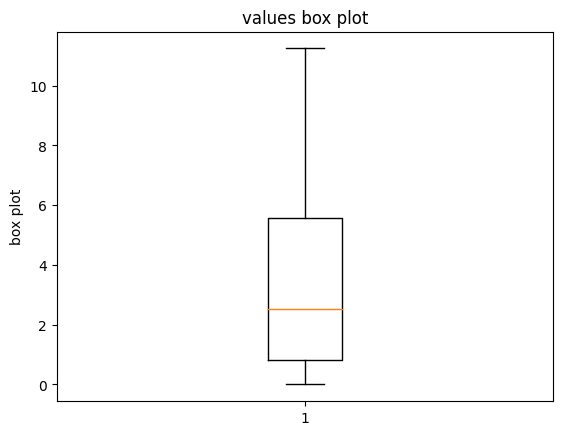

In [26]:
ac_sums = []
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    ac_sums.append(gr.algebraic_connectivity(rsrbg))

gr.calculate_statistics_parameters(ac_sums)

# Calculate Natural Connectitvity


mean is 4.4894031394209994
standard deviation is 3.1938355687329474
CI is (3.863411367949342, 5.1153949108926575)


(4.4894031394209994,
 3.1938355687329474,
 0.6259917714716576,
 (3.863411367949342, 5.1153949108926575))

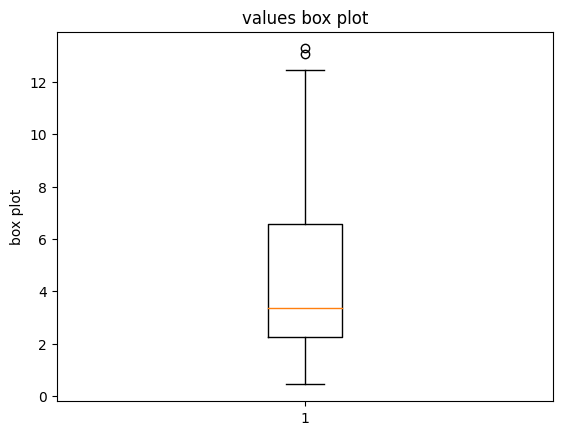

In [27]:
nc_sum = []
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    nc_sum.append(gr.natural_connectivity(rsrbg))

gr.calculate_statistics_parameters(nc_sum)

# Calculate Symmetry Ratio

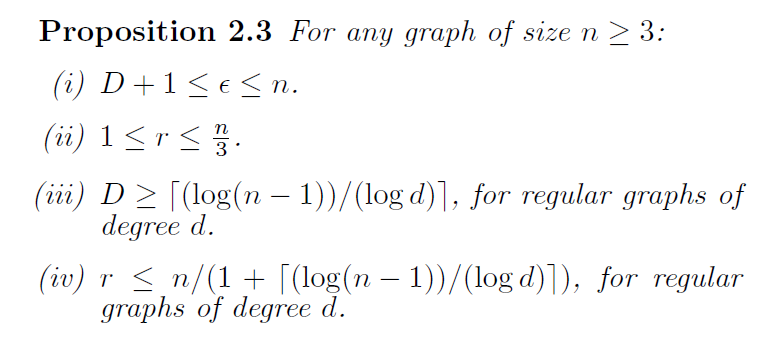

In [20]:
display(Image(filename='images/r.png'))

mean is 23.092827605931838
standard deviation is 24.033878530613567
CI is (18.38218741393158, 27.803467797932097)


(23.092827605931838,
 24.033878530613567,
 4.710640192000259,
 (18.38218741393158, 27.803467797932097))

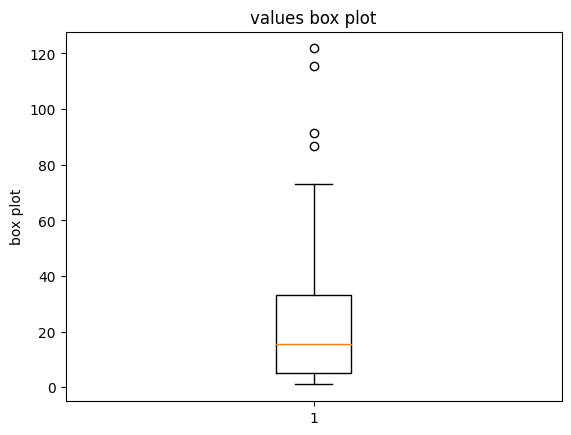

In [28]:
symmetry_sum = []
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    symmetry_sum.append(gr.symmetry_ratio(rsrbg))

gr.calculate_statistics_parameters(symmetry_sum)

# Calculate Energy

mean is 443.69757663271804
standard deviation is 465.4970272790543
CI is (352.4601592860234, 534.9349939794126)


(443.69757663271804,
 465.4970272790543,
 91.23741734669464,
 (352.4601592860234, 534.9349939794126))

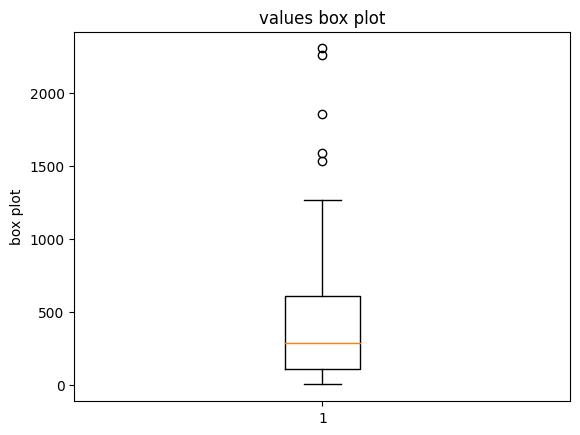

In [29]:
energy_sum = []
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    energy_sum.append(gr.energy(rsrbg))

gr.calculate_statistics_parameters(energy_sum)

# Calculate Laplacian Energy


mean is 733.3198054968441
standard deviation is 634.6880236543647
CI is (608.9209528605886, 857.7186581330996)


(733.3198054968441,
 634.6880236543647,
 124.39885263625547,
 (608.9209528605886, 857.7186581330996))

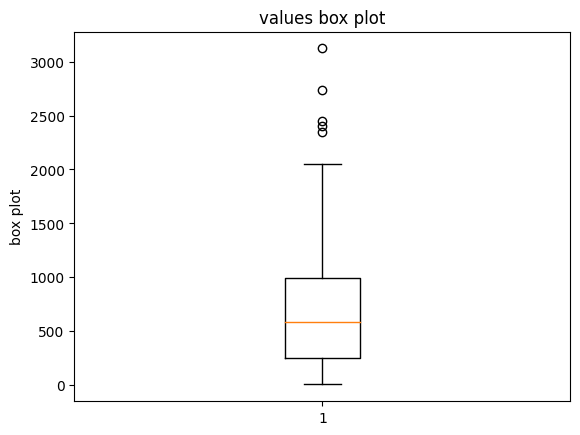

In [30]:
lap_energy_sum = []
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    lap_energy_sum.append(gr.laplacian_energy(rsrbg))

gr.calculate_statistics_parameters(lap_energy_sum)

# Conclusion

In [21]:
df.mean(axis=0)

n                          200.000000
d1                          10.100000
d2                           9.540000
spectral gap                 3.769846
algebratic connectivity      3.370638
natural connectivity         4.489403
r                           23.092828
energy                     443.697577
laplacian energy           733.319805
dtype: float64